In [ ]:
import zipfile
with zipfile.ZipFile("/content/myData.zip") as zip_ref:
  zip_ref.extractall("/content/")

**IMOPORT THƯ VIỆN CẦN THIẾT**

In [ ]:
import numpy as np
import cv2
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D

path = './myData/'

**IMPORTING DATA/IMAGES FROM FOLDERS **

In [ ]:
images = []
classID = []
categories = ['0','1','2','3','4','5','6','7','8','9']
for x in sorted(os.listdir(path)):
  myPicList = os.listdir(path+"/"+str(x))
  for y in myPicList:
    curImg = cv2.imread(path+"/"+str(x)+"/"+y)
    curImg = cv2.resize(curImg,(32,32))
    images.append(curImg)
    classID.append(categories.index(x))
  print(x,end= " ")
print(" ")
print("Total Images in Images List = ",len(images))
print("Total IDS in classID List= ",len(classID))

0 1 2 3 4 5 6 7 8 9  
Total Images in Images List =  10160
Total IDS in classID List=  10160


**CONVERT TO NUMPY ARRAY**

In [ ]:
images = np.array(images)
classID = np.array(classID)
print(images.shape)

(10160, 32, 32, 3)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(images,classID,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8128, 32, 32, 3)
(2032, 32, 32, 3)
(8128,)
(2032,)


**PLOT BAR CHART FOR DISTRIBUTION OF IMAGES**

[809, 835, 824, 790, 809, 803, 798, 825, 816, 819]


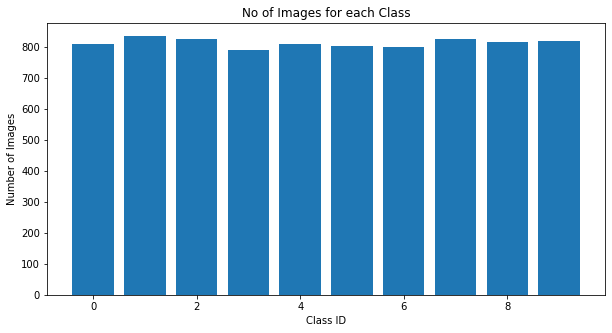

In [ ]:
numOfSamples= []
for x in range(0,10):
    numOfSamples.append(len(np.where(y_train==x)[0]))
print(numOfSamples)
#
plt.figure(figsize=(10,5))
plt.bar(range(0,10),numOfSamples)
plt.title("No of Images for each Class")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()

**PREPOSSESSING FUNCTION FOR IMAGES FOR TRAINING**

In [ ]:
def preProcessing(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.equalizeHist(img)
  img = img/255
  return img

In [ ]:
# img = preProcessing(X_train[30])
# img = cv2.resize(img,(300,300))
# cv2_imshow(img)
# cv2_imshow(X_train[30])
# # import sys
# # np.set_printoptions(threshold=5)
# # print(img)

In [ ]:
X_train= np.array(list(map(preProcessing,X_train)))
X_test= np.array(list(map(preProcessing,X_test)))

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

**IMAGE AUGMENTATION**

In [ ]:
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

In [ ]:
x = tf.keras.utils.img_to_array(X_train[30])
x = x.reshape((1,) + x.shape)

i = 0
for batch in dataGen.flow(x,batch_size=32,save_to_dir='preview',save_prefix='test',save_format='jpg'):
  i += 1
  if i > 10:
    break

In [ ]:
# !rm -rf preview

In [ ]:
dataGen.fit(X_train)

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

**CREATING MODEL**

In [ ]:
def myModel():
    noOfFilters = 60
    sizeOfFilter1 = (5,5)
    sizeOfFilter2 = (3,3)
    sizeOfPool = (2,2)
    noOfNodes= 500

    model = Sequential()
    model.add((Conv2D(noOfFilters,sizeOfFilter1,input_shape=(32,
                      32,1),activation='relu')))
    model.add((Conv2D(noOfFilters, sizeOfFilter1, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add((Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu')))
    model.add((Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(noOfNodes,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
model = myModel()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 60)        1560      
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 60)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                  

STARING TO TRAIN

In [ ]:
history = model.fit(dataGen.flow(X_train,y_train, batch_size=32),
                                 epochs=100)

Epoch 1/100
254/254 [==============================] - 82s 319ms/step - loss: 1.0021 - accuracy: 0.6484
Epoch 2/100
254/254 [==============================] - 82s 323ms/step - loss: 0.3001 - accuracy: 0.9032
Epoch 3/100
254/254 [==============================] - 81s 319ms/step - loss: 0.2106 - accuracy: 0.9336
Epoch 4/100
254/254 [==============================] - 81s 317ms/step - loss: 0.1868 - accuracy: 0.9409
Epoch 5/100
254/254 [==============================] - 83s 325ms/step - loss: 0.1511 - accuracy: 0.9514
Epoch 6/100
254/254 [==============================] - 83s 326ms/step - loss: 0.1369 - accuracy: 0.9566
Epoch 7/100
254/254 [==============================] - 81s 319ms/step - loss: 0.1237 - accuracy: 0.9626
Epoch 8/100
254/254 [==============================] - 81s 318ms/step - loss: 0.1075 - accuracy: 0.9665
Epoch 9/100
254/254 [==============================] - 82s 323ms/step - loss: 0.0990 - accuracy: 0.9695
Epoch 10/100
254/254 [==============================] - 80s 316m

**PLOT THE RESULTS**

In [ ]:
# plt.figure(1)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.legend(['training','validation'])
# plt.title('Loss')
# plt.xlabel('epoch')
# plt.figure(2)
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.legend(['training','validation'])
# plt.title('Accuracy')
# plt.xlabel('epoch')
# plt.show()

**EVALUATE USING TEST IMAGES**

In [ ]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Test Score =  0.008358064107596874
Test Accuracy = 0.9965550899505615


In [ ]:
model.save('Digits.h5') #Save model